In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, glob
os.environ['CUDA_VISIBLE_DEVICES'] = '0' # GPU
import tensorflow.python as tf

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from scipy import signal, ndimage
from scipy.io import loadmat, savemat
from skimage import data, img_as_float, exposure
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

In [87]:
from func_processing import get_avg_xy
model = tf.keras.models.load_model('./model/fcn')


In [88]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('./data/test/00001.png')

In [89]:
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

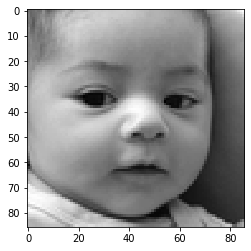

In [98]:
for (x, y, w, h) in faces:
    tmp = gray[y:y+h, x:x+w]
plt.imshow(tmp, cmap='gray')
# plt.show()
plt.savefig('./data/test/faceROI.png', dpi=300, bbox_inches='tight')

In [91]:
test_imgs = cv2.resize(tmp, (96,96), interpolation = cv2.INTER_AREA)
test_imgs = np.expand_dims(test_imgs, axis=0)
test_imgs = np.expand_dims(test_imgs, axis=3)
test_predict = model.predict(test_imgs)

In [92]:
y_pred = np.zeros(30)
for j in range(15):
    msk = np.squeeze(test_predict[0,:,:,j])
    yx, prob = get_avg_xy(msk, 25)
    y_pred[2*j] = yx[1] / 96
    y_pred[2*j+1] = yx[0] / 96

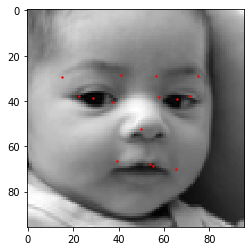

In [93]:
plt.imshow(np.squeeze(test_imgs), cmap='gray')
for i in range(15):
    plt.scatter(y_pred[2*i]*96, y_pred[2*i+1]*96, s=2, c='r')
plt.show()

In [94]:
y0 = np.zeros(30)
for j in range(15):
    y0[2*j] = y_pred[2*j] * w + x
    y0[2*j+1] = y_pred[2*j+1] * h + y

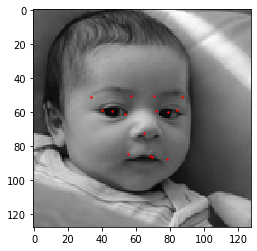

In [97]:
plt.imshow(gray, cmap='gray')
for i in range(15):
    plt.scatter(y0[2*i], y0[2*i+1], s=2, c='r')
# plt.show()
plt.savefig('./data/test/pred.png', dpi=300, bbox_inches='tight')